<a id="1"></a>
# <p style="padding:15px; background-color:#023047; font-family:fantasy; font-size:150%; color:#f2f2f0; text-align:center; border-radius: 20px 20px; font-weight:normal">SPACESHIP TITANIC</p>

---

#### **DESCRIPTION:**

_Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good._

_The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars._

_While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!_

#### **TASK:** 

_In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system._

#### **SEE MORE HERE:** 

https://www.kaggle.com/competitions/spaceship-titanic/overview

---

<a id="2"></a>
# <p style="padding:15px; background-color:#023047; font-family:fantasy; font-size:150%; color:#f2f2f0; text-align:center; border-radius: 20px 20px; font-weight:normal">1. EXPLORATORY DATA ANALYSIS (EDA)</p>

---

## **1.1 GLANCE AT THE DATASET:**

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Default settings for matplotlib.
DARK_BLUE = "#03002e"
LIGHT_GRAY = "#8f8f99"

plt.rc("font", size=14, family="serif")
plt.rc("legend", fontsize=14)
plt.rc("text", color=DARK_BLUE)

plt.rc("axes", labelsize=14)
plt.rc("axes", titlesize=14)
plt.rc("axes", labelpad=10)
plt.rc("axes", labelcolor=DARK_BLUE)
plt.rc("axes", grid=True)

plt.rc("xtick", labelsize=12, color=DARK_BLUE)
plt.rc("ytick", labelsize=12, color=DARK_BLUE)
plt.rc("xtick.major", pad=10)
plt.rc("ytick.major", pad=10)

plt.rc("grid", color=LIGHT_GRAY)
plt.rc("grid", linestyle="dashed")
plt.rc("grid", linewidth=0.5)
plt.rc("grid", alpha=0.5)

In [113]:
train_set = pd.read_csv("data/train.csv")
test_set = pd.read_csv("data/test.csv")

**Features Description:**
- `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [114]:
train_set.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [115]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [116]:
train_set.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Let's see which features are categorical and which are numerical.

In [117]:
cat_features = train_set.select_dtypes("object").columns
print(*cat_features, sep=", ")

PassengerId, HomePlanet, CryoSleep, Cabin, Destination, VIP, Name


In [118]:
numerical_features = train_set.select_dtypes("number").columns
print(*numerical_features, sep=", ")

Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck


Let's have a look at categorical features closely.

In [119]:
# I guess the `PassengerId`, `Name` and `Cabin` are mostly unique, so we can omit this here.
for cat_feature in cat_features.difference({"PassengerId", "Cabin", "Name"}):
    print(train_set[cat_feature].value_counts(), end="\n\n")

False    5439
True     3037
Name: CryoSleep, dtype: int64

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

False    8291
True      199
Name: VIP, dtype: int64



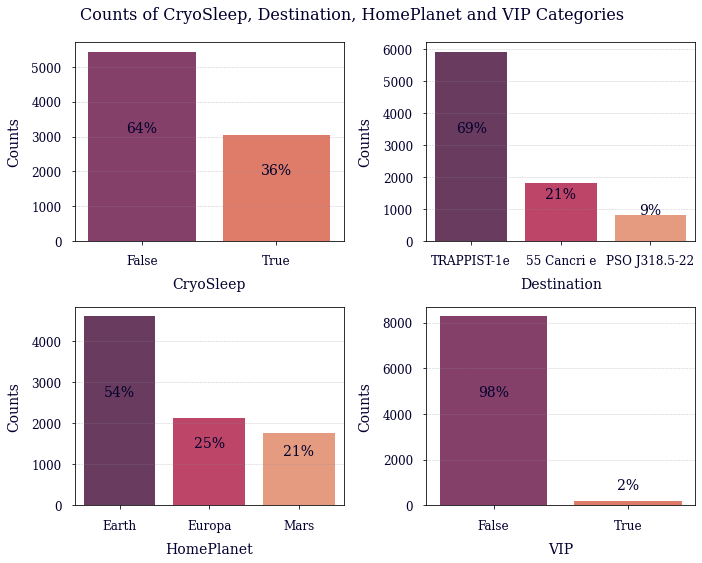

In [120]:
def plot_categories(features, axes):
    """Creates `countplot` for categories of the given features."""
    for feature, axis in zip(features, axes.ravel()):
        plt.sca(axis)
        frequencies = (train_set[feature].value_counts(normalize=True).round(2) * 100).astype(int)
        feature_plot = sns.countplot(x=train_set[feature], palette="rocket", alpha=0.9, order=frequencies.index)
        elements = feature_plot.containers
        for element in elements:
            feature_plot.bar_label(element, label_type="center", padding=18, labels=frequencies.astype(str) + "%")
        plt.ylabel("Counts")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), squeeze=False)
fig.suptitle("Counts of CryoSleep, Destination, HomePlanet and VIP Categories", fontsize=16)
plot_categories(("CryoSleep", "Destination", "HomePlanet", "VIP"), axes)
plt.tight_layout()
plt.show()

**We can easily see that:**
* Almost 2/3 of passengers are not in cryosleep.
* The vast majority (~70%) of passengers go to the TRAPPIST-1e.
* More than half of passengers come from the Earth.
* Almost all (~98%) passengers do not have VIP status.

At first glance, it is reasonable to fill NaN values for these features with the most frequent strategy. Let's see the `Transported` label yet.

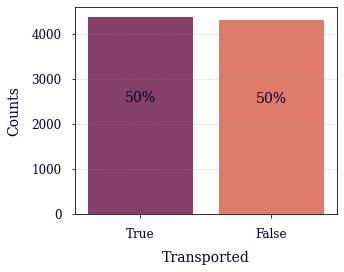

In [121]:
# With `squeeze=False` argument, axes object is always a 2D array.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), squeeze=False)
plot_categories(("Transported", ), axes)
plt.tight_layout()
plt.show()

Let's see the remain categorical features i.e. `PassengerId`, `Name` and `Cabin`.

In [122]:
for cat_feature in ("PassengerId", "Cabin", "Name"):
    print(f"{cat_feature} unique values: ".ljust(30), len(train_set[cat_feature].unique()),
          f"\t{len(train_set[cat_feature].unique()) / len(train_set[cat_feature]):.0%}")

PassengerId unique values:     8693 	100%
Cabin unique values:           6561 	75%
Name unique values:            8474 	97%


**As we can see, there are mostly unique values. We will handle these features later, in the Feature Engineering section.**

We can read that the _CryoSleep indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins_.

Let's see how a data frame looks for the passengers that are in CryoSleep. I suppose they should have zero values for the amenities like a `Spa` or `VRDeck`.

In [123]:
amenities = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
train_set.loc[train_set["CryoSleep"] == True, amenities][:10]

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7,0.0,0.0,0.0,0.0,NaN
9,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,NaN,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,NaN,0.0,0.0
25,NaN,0.0,0.0,0.0,0.0
28,0.0,0.0,NaN,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0


Now let's have a look at how many NaN values there are.

In [124]:
train_set.loc[train_set["CryoSleep"] == True, amenities].isna().sum()

RoomService     68
FoodCourt       70
ShoppingMall    96
Spa             65
VRDeck          62
dtype: int64

I think filling these NaN values for people in `CryoSleep` with zeros is more reasonable. Filling these with the median, in this case, has no sense. Moreover there is a probably good idea to merge these features into one another - for example Expenses.

**Let's take a look at the numerical features now.**

In [125]:
for method in ("mean", "median", "std"):
    value = getattr(train_set["Age"], method)()
    print(f"{method.upper()}:".ljust(15), f"{value:.2f}")

MEAN:           28.83
MEDIAN:         27.00
STD:            14.49


In [126]:
# For all passenger. 
for feature in numerical_features.difference({"Age"}):
    print(f"{feature}:".ljust(15), feature)
    for method in ("mean", "median", "std"):
        value = getattr(train_set[feature], method)()
        print(f"{method.upper()}:".ljust(15), f"{value:.2f}")
    print()

FoodCourt:      FoodCourt
MEAN:           458.08
MEDIAN:         0.00
STD:            1611.49

RoomService:    RoomService
MEAN:           224.69
MEDIAN:         0.00
STD:            666.72

ShoppingMall:   ShoppingMall
MEAN:           173.73
MEDIAN:         0.00
STD:            604.70

Spa:            Spa
MEAN:           311.14
MEDIAN:         0.00
STD:            1136.71

VRDeck:         VRDeck
MEAN:           304.85
MEDIAN:         0.00
STD:            1145.72



In [127]:
# For only those, that are not in CryoSleep .
not_in_cryosleep = (train_set["CryoSleep"] == False)
for feature in numerical_features.difference({"Age"}):
    print(f"{feature}:".ljust(15), feature)
    for method in ("mean", "median", "std"):
        value = getattr(train_set.loc[not_in_cryosleep, feature], method)()
        print(f"{method.upper()}:".ljust(15), f"{value:.2f}")
    print()

FoodCourt:      FoodCourt
MEAN:           713.00
MEDIAN:         5.00
STD:            1970.55

RoomService:    RoomService
MEAN:           350.15
MEDIAN:         3.00
STD:            803.08

ShoppingMall:   ShoppingMall
MEAN:           270.59
MEDIAN:         2.00
STD:            741.76

Spa:            Spa
MEAN:           486.09
MEDIAN:         7.00
STD:            1396.23

VRDeck:         VRDeck
MEAN:           475.72
MEDIAN:         4.00
STD:            1404.17



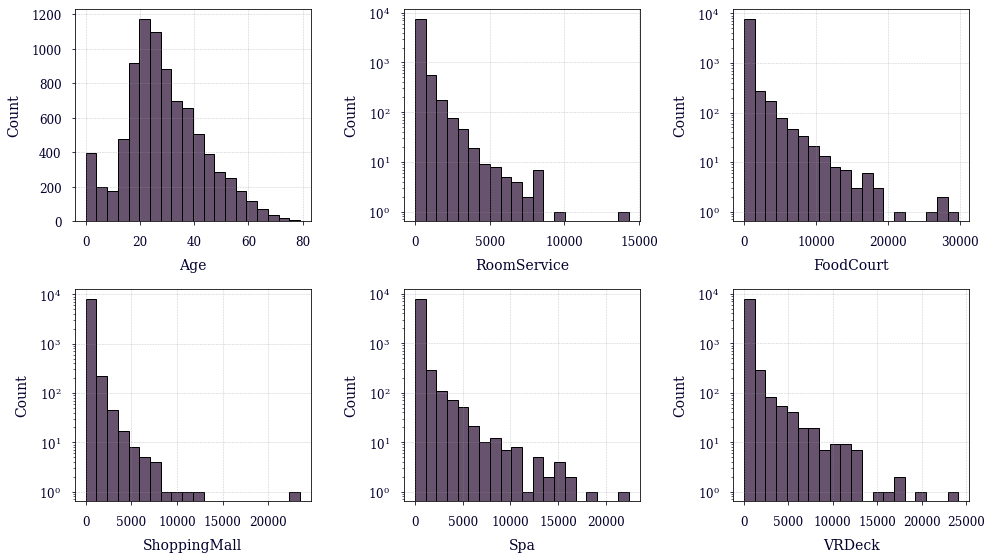

In [128]:
sns.set_palette("rocket")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
for numeric_feature, ax in zip(numerical_features, axes.ravel()):  # type: ignore
    plt.sca(ax)
    sns.histplot(x=train_set[numeric_feature], bins=20)
    if not numeric_feature == "Age":
        plt.yscale("log")

plt.tight_layout()
plt.show()

**Quick summary of numerical features:**
- We see the `Age` feature has an interesting number of counts for the children (infants?).
- The majority of passengers spent little money on various amenities. The median value for each amenity is minimal (~0).
- Some passengers spend a lot of money on various amenities. The STD values are enormous concerning mean values.
- We can suspect a small percentage of passengers are rich.

Let's have a look at something interesting.

In [129]:
len(train_set.loc[np.isclose(train_set["Age"], 0.), "Age"].index)

178

There are 178 embryos?

In [130]:
correlations = train_set.corr()
correlations["Transported"].sort_values(ascending=False)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

Spending more on luxury amenities, they were less prone to transport?

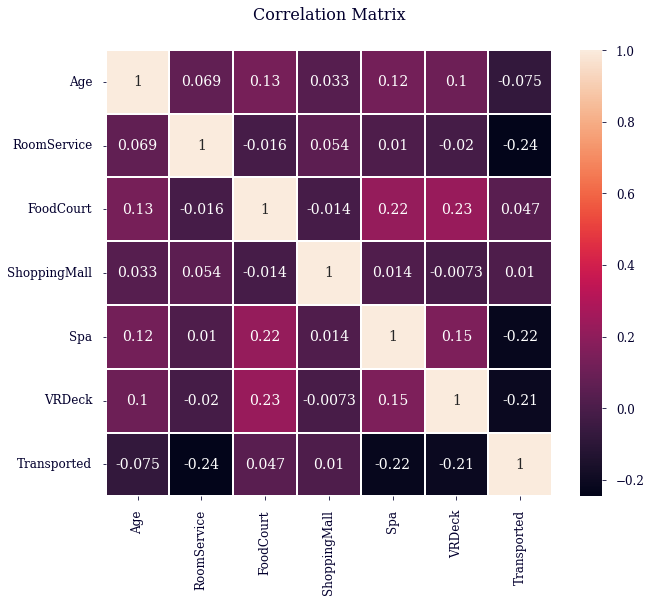

In [131]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, square=True, linewidths=2, annot=True, cbar_kws={"shrink": 0.82})
plt.title("Correlation Matrix", fontsize=16, pad=30)
plt.show()

**Summary. What should we do with available features:**
- `PassengerId` - Always unique and has no NaN values. An interesting allude is that people in a group often are family members. We try to extract these groups.
- `HomePlanet` - Categorical feature with three categories - planet names. More than 50% of passengers are from the Earth. It's reasonable to fill NaN values with the most frequent category (Earth).
- `CryoSleep` - Categorical feature (True/False). Around 64% of passengers are not in cryosleep. Let's fill NaN values with the most frequent value (False).
- `Cabin` - Categorical feature, but there are almost as many categories as instances. There are missing values. We will take a closer look at this. 
- `Destination` - Categorical feature with three categories - planet names. Around 70% of passengers are travelling to TRAPPIST-1e. We fill in missing values with this planet.
- `Age` - Numeric feature. We fill NaN values with the median. There are almost 200 passengers that are embryos.
- `VIP` - Categorical feature (True/False). Most (98%) don't have VIP status.
- `Name` - We should probably drop this feature now. We can split this feature into men and women when we have Polish names here, for example.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Numerical features. There is probably a good idea to fill NaN values for people with `CryoSleep=True` with zero. For the rest, fill with the median calculated for only those with `CryoSleep=False`.

---

## **1.2. FEATURE ENGINEERING:**

Let's create a copy to not overwrite or modify the original set.

In [132]:
train_set_copy = train_set.copy()

Now let's look at the ratio of transported passengers regarding the categories of given features.

In [133]:
home_planet_vs_transported = train_set_copy[["HomePlanet", "Transported"]].groupby(["HomePlanet"]).mean()
cryosleep_vs_transported = train_set_copy[["CryoSleep", "Transported"]].groupby(["CryoSleep"]).mean()
destination_vs_transported = train_set_copy[["Destination", "Transported"]].groupby(["Destination"]).mean()
vip_vs_transported = train_set_copy[["VIP", "Transported"]].groupby(["VIP"]).mean()

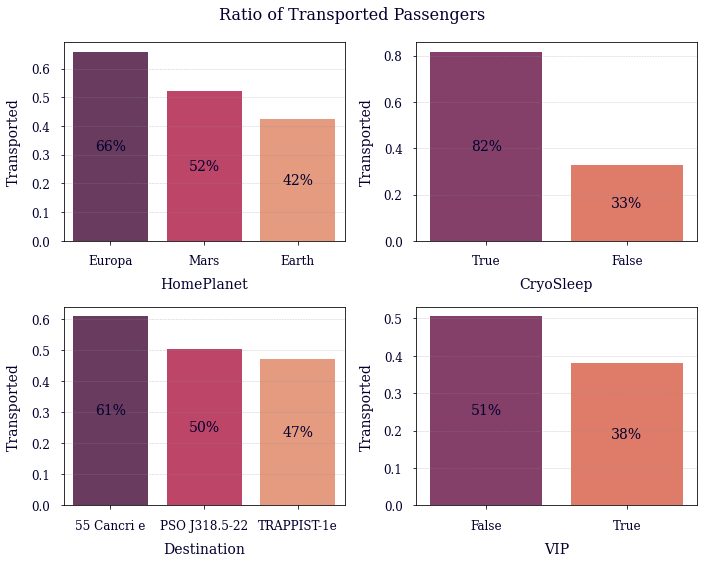

In [134]:
def plot_categories_vs_transported(features_vs_transported, axes):
    for feature_vs_transported, axis in zip(features_vs_transported, axes.ravel()):
        plt.sca(axis)
        feature_vs_transported = feature_vs_transported.sort_values(by="Transported", ascending=False)
        feature_plot = sns.barplot(x=feature_vs_transported.index, y=feature_vs_transported["Transported"],
                               palette="rocket", order=feature_vs_transported.index, alpha=0.9)
        elements = feature_plot.containers
        for element in elements:
            labels = ((feature_vs_transported["Transported"].round(2) * 100).astype(int)).astype(str) + "%"
            feature_plot.bar_label(element, label_type="center", labels=labels)

features_vs_transported = (
    home_planet_vs_transported,
    cryosleep_vs_transported,
    destination_vs_transported,
    vip_vs_transported,
)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), squeeze=False)
fig.suptitle("Ratio of Transported Passengers", fontsize=16)
plot_categories_vs_transported(features_vs_transported, axes) 
plt.tight_layout()
plt.show()

**Woah! Around 82% of passengers in cryosleep were transported to an alternate dimension. As we remember, there were about 3000 passengers in cryosleep. It means that around 0.82 * 3000 = 2460 has been transported, isn't it?**

In [135]:
len(train_set_copy[(train_set_copy["CryoSleep"] == True) & (train_set_copy["Transported"] == True)])

2483

**Now let's create some new features:**
- `Expenses` - the sum of the `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa` and `VRDeck` features.
- `HasExpenses` - True for passengers with `Expenses>0`, False otherwise.
- `IsEmbryo` - True for passengers with `Age=0`. False otherwise.
- `CabinDeck` - Deck of the `Cabin` feature.
- `CabinSide` - Side of the `Cabin` feature.
- `IsAlone` - True for passengers who travelled alone, False otherwise. We try to extract this feature from the `PassengerId` and clues from its description.

And we will see if these are helpful.

In [136]:
train_set_copy["Expenses"] = train_set_copy[amenities].sum(axis=1)
train_set_copy["HasExpenses"] = ~np.isclose(train_set_copy["Expenses"], 0.)
has_expenses_vs_transpoted = train_set_copy[["HasExpenses", "Transported"]].groupby(["HasExpenses"]).mean()

In [137]:
train_set_copy["IsEmbryo"] = np.isclose(train_set_copy["Age"], 0.)
is_embryo_vs_transported = train_set_copy[["IsEmbryo", "Transported"]].groupby(["IsEmbryo"]).mean()

In [138]:
train_set_copy[["CabinDeck", "CabinNum", "CabinSide"]] = train_set_copy["Cabin"].str.split("/", expand=True)
cabin_deck_vs_transported = train_set_copy[["CabinDeck", "Transported"]].groupby(["CabinDeck"]).mean()
cabin_side_vs_transported = train_set_copy[["CabinSide", "Transported"]].groupby(["CabinSide"]).mean()

In [139]:
passenger_groups = train_set_copy["PassengerId"].str[:4]  # Four first digits because: "... gggg_pp where gggg indicates a group..."
is_alone = (passenger_groups.value_counts() == 1).reindex(passenger_groups)  # Only alone passengers have a unique group (thus 1).
train_set_copy["IsAlone"] = is_alone.tolist()
is_alone_vs_transported = train_set_copy[["IsAlone", "Transported"]].groupby(["IsAlone"]).mean()

Let's plot these new features.

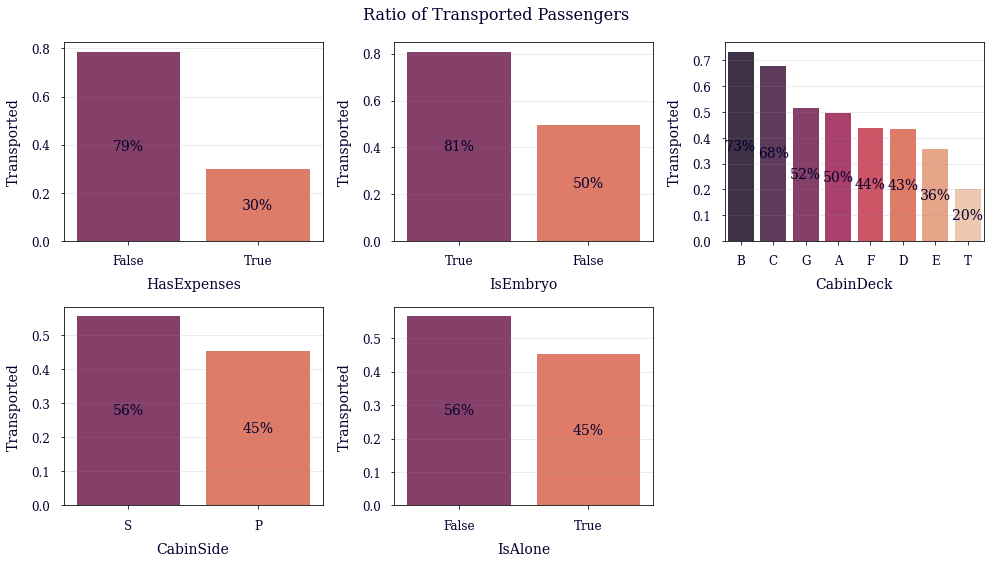

In [140]:
new_features_vs_transported = (
    has_expenses_vs_transpoted,
    is_embryo_vs_transported,
    cabin_deck_vs_transported,
    cabin_side_vs_transported,
    is_alone_vs_transported,
)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8), squeeze=False)
fig.suptitle("Ratio of Transported Passengers", fontsize=16)
plot_categories_vs_transported(new_features_vs_transported, axes) 
plt.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

In [141]:
for new_feature in ("HasExpenses", "IsEmbryo", "CabinDeck", "CabinSide", "IsAlone"):
    print(train_set_copy[new_feature].value_counts(), end="\n\n")

True     5040
False    3653
Name: HasExpenses, dtype: int64

False    8515
True      178
Name: IsEmbryo, dtype: int64

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

S    4288
P    4206
Name: CabinSide, dtype: int64

True     4805
False    3888
Name: IsAlone, dtype: int64



## **1.3. SUMMARY:**

**To sum up, what do we need to do with this dataset before putting it to ML algorithms:**

**Existing features:**
- `PassengerId` - Nothing to do. To be removed at the final stage.
- `HomePlanet` - Fill in missing values with the most frequent category (Earth). Then apply OneHotEncoder.
- `CryoSleep` - Fill in missing values with the most frequent category (False). Then apply OrdinalEncoder.
- `Cabin` - Nothing to do. To be removed at the final stage.
- `Destination` - Fill in missing values with the most frequent category (TRAPPIST-1e). Then apply OneHotEncoder.
- `Age` - Fill in missing values with the median strategy. Then apply log1p transformer.
- `VIP` - Fill in missing values with the most frequent category (False). Then apply OrdinalEncoder.
- `RoomService` - Fill in missing values for passengers in cryosleep with zero. For all others with the median. Then apply log1p transformer.
- `FoodCourt` - Fill in missing values for passengers in cryosleep with zero. For all others with the median. Then apply log1p transformer.
- `ShoppingMall` - Fill in missing values for passengers in cryosleep with zero. For all others with the median. Then apply log1p transformer.
- `Spa` - Fill in missing values for passengers in cryosleep with zero. For all others with the median. Then apply log1p transformer.
- `VRDeck` - Fill in missing values for passengers in cryosleep with zero. For all others with the median. Then apply log1p transformer.
- `Name` - Nothing to do. To be removed at the final stage.
- `Transported` - Nothing to do. It is our label.

**Add new features (described earlier):**
- `Expenses`
- `HasExpenses`
- `IsEmbryo`
- `CabinDeck`
- `CabinSide`
- `IsAlone`

---

<a id="2"></a>
# <p style="padding:15px; background-color:#023047; font-family:fantasy; font-size:150%; color:#f2f2f0; text-align:center; border-radius: 20px 20px; font-weight:normal">2. PREPROCESSING</p>

---

In [142]:
# Let's remove the label.
train_labels = train_set["Transported"]
train_set = train_set.drop("Transported", axis=1)

## **2.1. FEATURE ADDER CLASS FOR AUTOMATIC FEATURE ADDING.:**

We will create a `FeatureAdder` class to simply include new features into the dataset so that it will be compatible with Scikit-Learn transformers and pipelines. 

The following code should explain itself.

In [143]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_expenses=True, add_is_embryo=True, add_cabin_split=True, add_is_alone=True):
        """Initialize which new features should be included."""
        self.add_expenses = add_expenses
        self.add_is_embryo = add_is_embryo
        self.add_cabin_split = add_cabin_split
        self.add_is_alone = add_is_alone

    def fit(self, X, y=None):
        """Calculates the median value for all of the amenities and only for these 
        passengers who are in CryoSleep."""
        if not isinstance(X, pd.DataFrame):
            raise TypeError("X must be a pandas DataFrame.")
        
        not_in_cryosleep = (X["CryoSleep"] == False)
        self.amenity_medians_ = {
            "RoomService": X.loc[not_in_cryosleep, "RoomService"].median(),
            "FoodCourt": X.loc[not_in_cryosleep, "FoodCourt"].median(),
            "ShoppingMall": X.loc[not_in_cryosleep, "ShoppingMall"].median(),
            "Spa": X.loc[not_in_cryosleep, "Spa"].median(),
            "VRDeck": X.loc[not_in_cryosleep, "VRDeck"].median(),
        }
        
        self.n_features_in_ = X.shape[1]
        self.feature_names_in_ = np.array(X.columns, dtype=object)
        
        return self
    
    def transform(self, X, y=None):
        """Returns a new `X` instance with included additional features."""
        if not isinstance(X, pd.DataFrame):
            raise TypeError("X must be a pandas DataFrame.")
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features.")
        check_is_fitted(self)
        X = X.copy()
        
        if self.add_expenses:
            not_in_cryosleep = (X["CryoSleep"] == False)
            for amenity, median in self.amenity_medians_.items():
                X.loc[~not_in_cryosleep, amenity] = X.loc[~not_in_cryosleep, amenity].fillna(0.)
                X.loc[not_in_cryosleep, amenity] = X.loc[not_in_cryosleep, amenity].fillna(median)
            X["Expenses"] = X[self.amenity_medians_.keys()].sum(axis=1)
            X["HasExpenses"] = (X["Expenses"] > 0.)
            
        if self.add_is_embryo:
            X["IsEmbryo"] = np.isclose(X["Age"], 0.)
            
        if self.add_cabin_split:
            X[["CabinDeck", "CabinNum", "CabinSide"]] = X["Cabin"].str.split("/", expand=True)
            
        if self.add_is_alone:
            groups = X["PassengerId"].str[:4]
            is_alone = (groups.value_counts() == 1).reindex(groups)
            X["IsAlone"] = is_alone.tolist()
            
        return X
    
    def get_feature_names_out(self, input_features=None):
        if not input_features:
            names = getattr(self, "feature_names_in_")
            if self.add_expenses:
                names = np.r_[names, ["Expenses", "HasExpenses"]]
            if self.add_is_embryo:    
                names = np.r_[names, ["IsEmbryo"]]
            if self.add_cabin_split:
                names = np.r_[names, ["CabinDeck", "CabinNum", "CabinSide"]]
            if self.add_is_alone:
                names = np.r_[names, ["IsAlone"]]
            return names
        if len(input_features) != self.n_features_in_:
            raise ValueError("Invalid number of features.")
        if hasattr(self, "feature_names_in_") and not np.all(self.feature_names_in_ == input_features):
            raise ValueError("The `input_features` is not equal to `feature_names_in_`.")
        return np.r_[self.feature_names_in_, input_features]

Now we will create a transformation pipeline for automatic data preparation.

In [144]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

hot_encoder_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())
ord_encoder_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder())
log1p_transformer = FunctionTransformer(np.log1p, np.expm1, feature_names_out="one-to-one", check_inverse=False)

# This imputer applies the median strategy only when we decide to set `add_expenses=False`
# in the `FeatureAdder()` instance. `FeatureAdder()` fills NaN values for amenities by default.
amenity_pipeline = make_pipeline(SimpleImputer(strategy="median"), log1p_transformer)

# If you don't want some feature added by default by `FeatureAdder()`, you must set this
# in its constructor in the `preprocessing` pipeline. Moreover, you must discard this
# feature from the `feature_transformer` list too.
feature_transformer = make_column_transformer(  # Unlisted features are dropped.
    (hot_encoder_pipeline, ["HomePlanet", "Destination", "CabinDeck"]),
    (ord_encoder_pipeline, ["CryoSleep", "HasExpenses", "IsEmbryo", "IsAlone", "CabinSide"]),
    (amenity_pipeline, ["Spa", "RoomService", "VRDeck", "FoodCourt", "ShoppingMall", "Expenses"]),
)

preprocessing = make_pipeline(FeatureAdder(), feature_transformer)

Let's see how it looks.

In [145]:
train_set_prepared = preprocessing.fit_transform(train_set)
train_set_prepared_df = pd.DataFrame(train_set_prepared, columns=preprocessing.get_feature_names_out())
train_set_prepared_df.head()

,pipeline-1__HomePlanet_Earth,pipeline-1__HomePlanet_Europa,pipeline-1__HomePlanet_Mars,pipeline-1__Destination_55 Cancri e,pipeline-1__Destination_PSO J318.5-22,pipeline-1__Destination_TRAPPIST-1e,pipeline-1__CabinDeck_A,pipeline-1__CabinDeck_B,pipeline-1__CabinDeck_C,pipeline-1__CabinDeck_D,...,pipeline-2__HasExpenses,pipeline-2__IsEmbryo,pipeline-2__IsAlone,pipeline-2__CabinSide,pipeline-3__Spa,pipeline-3__RoomService,pipeline-3__VRDeck,pipeline-3__FoodCourt,pipeline-3__ShoppingMall,pipeline-3__Expenses
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,6.309918,4.700480,3.806662,2.302585,3.258097,6.602588
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,8.812248,3.784190,3.912023,8.182280,0.000000,9.248021
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,8.110728,0.000000,5.267858,7.157735,5.918894,8.551981
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,6.338594,5.717028,1.098612,4.262680,5.023881,6.995766


It looks like everything is fine here :)

---

<a id="3"></a>
# <p style="padding:15px; background-color:#023047; font-family:fantasy; font-size:150%; color:#f2f2f0; text-align:center; border-radius: 20px 20px; font-weight:normal">3. MACHINE LEARNING AND MODEL SELECTION</p>

---

## **3.1. MODEL SELECTION:**

Let's check several classifiers with default hyperparameters using 10-fold cross-validation.

In [146]:
from sklearn.model_selection import cross_val_score

In [147]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_scores = cross_val_score(forest_clf, train_set_prepared, train_labels, cv=10)

In [148]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_scores = cross_val_score(svm_clf, train_set_prepared, train_labels, cv=10)

In [149]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_scores = cross_val_score(sgd_clf, train_set_prepared, train_labels, cv=10)

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, train_set_prepared, train_labels, cv=10)

In [151]:
from sklearn.linear_model import LogisticRegression

lin_reg_clf = LogisticRegression(random_state=42, max_iter=1000)
lin_reg_scores = cross_val_score(lin_reg_clf, train_set_prepared, train_labels, cv=10)

In [152]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees_clf = ExtraTreesClassifier(random_state=42)
extra_trees_scores = cross_val_score(extra_trees_clf, train_set_prepared, train_labels, cv=10)

In [153]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_scores = cross_val_score(tree_clf, train_set_prepared, train_labels, cv=10)

In [154]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=42)
ada_scores = cross_val_score(ada_clf, train_set_prepared, train_labels, cv=10)

In [155]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(random_state=42)
gbc_scores = cross_val_score(gbc_clf, train_set_prepared, train_labels, cv=10)

Now let's plot boxplots of these classifiers' scores.

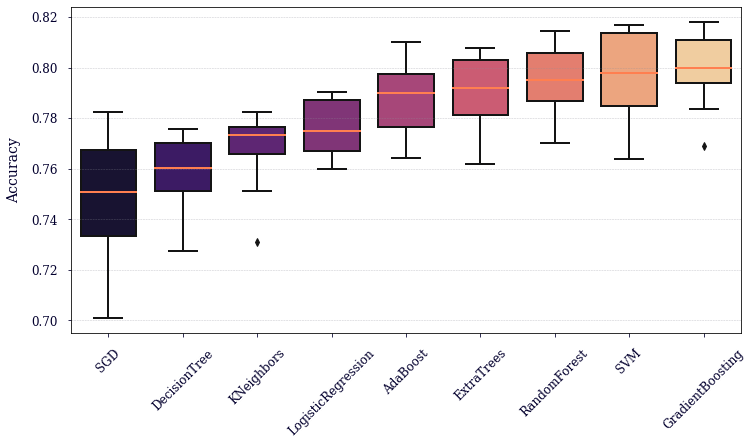

In [156]:
clf_scores = pd.DataFrame({
    "RandomForest": forest_scores,
    "SVM": svm_scores,
    "SGD": sgd_scores,
    "KNeighbors": knn_scores,
    "LogisticRegression": lin_reg_scores,
    "ExtraTrees": extra_trees_scores,
    "DecisionTree": tree_scores,
    "AdaBoost": ada_scores,
    "GradientBoosting": gbc_scores,
})

sorted_clfs = clf_scores.mean().sort_values().index
clf_scores_sorted = clf_scores[sorted_clfs]

plt.figure(figsize=(12, 6))
sns.boxplot(data=clf_scores_sorted, palette="magma", saturation=0.75, width=0.75,
            fliersize=5, linewidth=2, medianprops={"color": "coral"})
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


In [157]:
clf_scores_sorted.describe()

,SGD,DecisionTree,KNeighbors,LogisticRegression,AdaBoost,ExtraTrees,RandomForest,SVM,GradientBoosting
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.747497,0.757397,0.767978,0.776374,0.788341,0.790180,0.795127,0.796850,0.799500
std,0.028540,0.016120,0.015821,0.011466,0.015164,0.015729,0.013928,0.018324,0.014864
min,0.700806,0.727586,0.731034,0.759770,0.764368,0.762069,0.770115,0.764097,0.768966
25%,0.733548,0.751438,0.765890,0.767039,0.776661,0.781261,0.786883,0.784997,0.794195
50%,0.751005,0.760209,0.773432,0.775158,0.789988,0.791834,0.795167,0.798044,0.799770
75%,0.767328,0.770138,0.776755,0.787399,0.797468,0.803222,0.805811,0.813922,0.810990
max,0.782509,0.775604,0.782509,0.790564,0.810127,0.807825,0.814730,0.817031,0.818182


Let's take `RandomForestClassifier`, `SVM` and `GradientBoostingClassifier` and try to play with their hyperparameters.

Let's see yet which features are really important.

In [158]:
forest_clf.fit(train_set_prepared, train_labels)
feature_importances = forest_clf.feature_importances_  
feature_names = preprocessing.get_feature_names_out()
# After preprocessing, features have additional prefixes from pipelines.
feature_names = pd.Series(feature_names).str.extract("__(.*)").values.ravel()

importances = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
 
for feature, importance in importances:
    print(feature.ljust(25), f"{importance:.5f}")

Expenses                  0.18482
Spa                       0.10983
FoodCourt                 0.10431
VRDeck                    0.09816
RoomService               0.09131
ShoppingMall              0.09009
HasExpenses               0.07327
CryoSleep                 0.05336
CabinSide                 0.02289
HomePlanet_Earth          0.02180
CabinDeck_F               0.01872
CabinDeck_G               0.01814
CabinDeck_E               0.01812
HomePlanet_Europa         0.01804
IsAlone                   0.01605
HomePlanet_Mars           0.01048
Destination_TRAPPIST-1e   0.01035
Destination_55 Cancri e   0.00998
CabinDeck_C               0.00654
Destination_PSO J318.5-22 0.00651
CabinDeck_B               0.00610
CabinDeck_D               0.00435
IsEmbryo                  0.00430
CabinDeck_A               0.00245
CabinDeck_T               0.00003


---

## **3.2 MODEL TUNE:**

In [159]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, expon, reciprocal, uniform

We will start with the `RandomForestClassifier` first.

In [ ]:
param_dist = {
    "n_estimators": randint(100, 200),
    "max_depth": randint(5, 15),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 8),
    "max_leaf_nodes": randint(100, 400),
    "min_impurity_decrease": uniform(1e-5, 1e-4),
}

forest_rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_dist, cv=10, n_iter=100, 
                                       n_jobs=-1, scoring="accuracy", random_state=42)
forest_rnd_search.fit(train_set_prepared, train_labels);

In [ ]:
param_dist = {
    "C": uniform(10, 25),
    "gamma": ["auto", "scale"],
}

svm_rnd_search = RandomizedSearchCV(svm_clf, param_distributions=param_dist, cv=10, n_iter=100,
                                    n_jobs=-1, scoring="accuracy", random_state=42)
svm_rnd_search.fit(train_set_prepared, train_labels);

In [ ]:
param_dist = {
    "n_estimators": randint(100, 200),
    "learning_rate": reciprocal(0.001, 1.0),
    "max_depth": randint(5, 15),
    "max_leaf_nodes": randint(2, 12),
    "min_samples_split": randint(2, 12),
    "min_samples_leaf": randint(1, 8),
    "min_impurity_decrease": uniform(0.001, 0.1),
    "n_iter_no_change": randint(5, 15),
    "max_features": randint(10, 25),
}

gbc_rnd_search = RandomizedSearchCV(gbc_clf, param_distributions=param_dist, cv=10, n_iter=100,
                                    n_jobs=-1, scoring="accuracy", random_state=42)
gbc_rnd_search.fit(train_set_prepared, train_labels);

Let's see on the results.

In [ ]:
best_scores = (
    forest_rnd_search.best_score_,
    svm_rnd_search.best_score_,
    gbc_rnd_search.best_score_,
)

best_classifiers = (
    forest_rnd_search.best_estimator_,
    svm_rnd_search.best_estimator_,
    gbc_rnd_search.best_estimator_,
)

for best_clf, best_score in zip(best_classifiers, best_scores):
    print(f"Best {best_clf.__class__.__name__}:".ljust(35), f"{best_score:.6f}")

Best RandomForestClassifier:        0.800995
Best SVC:                           0.801799
Best GradientBoostingClassifier:    0.806287


And we can glance at best hyperparameters of the `GradientBoostingClassifier`.

In [ ]:
print("Best classifier".ljust(25), gbc_rnd_search.best_estimator_.__class__.__name__)
for hyperparam, value in gbc_rnd_search.best_params_.items():
    print(f"{hyperparam.ljust(25):}", value)

Best classifier           GradientBoostingClassifier
learning_rate             0.10353854394033839
max_depth                 6
max_features              21
max_leaf_nodes            9
min_impurity_decrease     0.0032184742030301632
min_samples_leaf          2
min_samples_split         3
n_estimators              153
n_iter_no_change          10


We can easily save this model with `joblib`.

In [ ]:
import joblib

joblib.dump(gbc_rnd_search.best_estimator_, "spaceship_titanic_best_model.pkl");

And load it when we need it.

In [162]:
final_model = joblib.load("spaceship_titanic_best_model.pkl")

## **3.3. FINAL PREDICTIONS:**

In [163]:
test_set_prepared = preprocessing.transform(test_set)
results = final_model.predict(test_set_prepared)

sumbission = pd.DataFrame({ "PassengerId": test_set["PassengerId"], "Transported": results})
sumbission.set_index("PassengerId").to_csv("data/submission.csv")